# 1

,Ім'я файлу,Колірна модель,Формат,Канали,Розмір файлу (МБ),Ширина,Висота,Мініатюра
0,19542969.jpg,RGB,JPEG,3,0.06,564,564,
1,238923_1_trinixy_ru.jpg,RGB,JPEG,3,0.12,640,800,
2,246897_1_trinixy_ru.jpg,RGB,JPEG,3,0.03,640,485,
3,700305174.png,RGBA,PNG,4,1.54,900,900,
4,764f95f44260ef4aafaa2e80a0f59784.jpg,RGB,JPEG,3,0.19,950,480,
5,9ca0f7df1de31d9e7c9c366f76793dd3.png,RGBA,PNG,4,0.14,240,320,
6,bee-on-daisy.jpg,RGB,JPEG,3,0.36,2560,1674,
7,depositphotos_634821438-stock-photo-beautiful-sunset-sea.webp,RGB,WEBP,3,0.09,600,600,
8,foto-4119-0.jpg,RGB,JPEG,3,0.02,750,499,
9,foto-4311-0.jpg,RGB,JPEG,3,0.03,750,499,

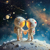
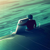
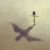
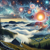
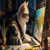
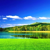
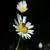
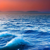
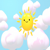
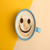
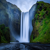
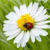
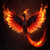
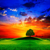
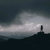

In [17]:
import os
from PIL import Image
import pandas as pd
from IPython.display import display, HTML
import base64
from io import BytesIO

def get_images_info(folder_path):
    data = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        try:
            with Image.open(file_path) as img:
                img_info = {
                    "Ім'я файлу": file_name,
                    "Колірна модель": img.mode,
                    "Формат": img.format,
                    "Канали": len(img.getbands()),
                    "Розмір файлу (МБ)": round(os.path.getsize(file_path) / (1024 * 1024), 2),
                    "Ширина": img.width,
                    "Висота": img.height,
                    "Мініатюра": f'<img src="data:image/png;base64,{image_to_base64(img.resize((50, 50)))}">'
                }
                data.append(img_info)
        except Exception:
            continue

    df = pd.DataFrame(data)
    pd.set_option('display.max_colwidth', None)
    display(HTML(df.to_html(escape=False)))
    return df

def image_to_base64(img):
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode('utf-8')
    return img_str

image_folder = r"D:\FastFile\PYTHON\pic"
image_info_df = get_images_info(image_folder)


# 2

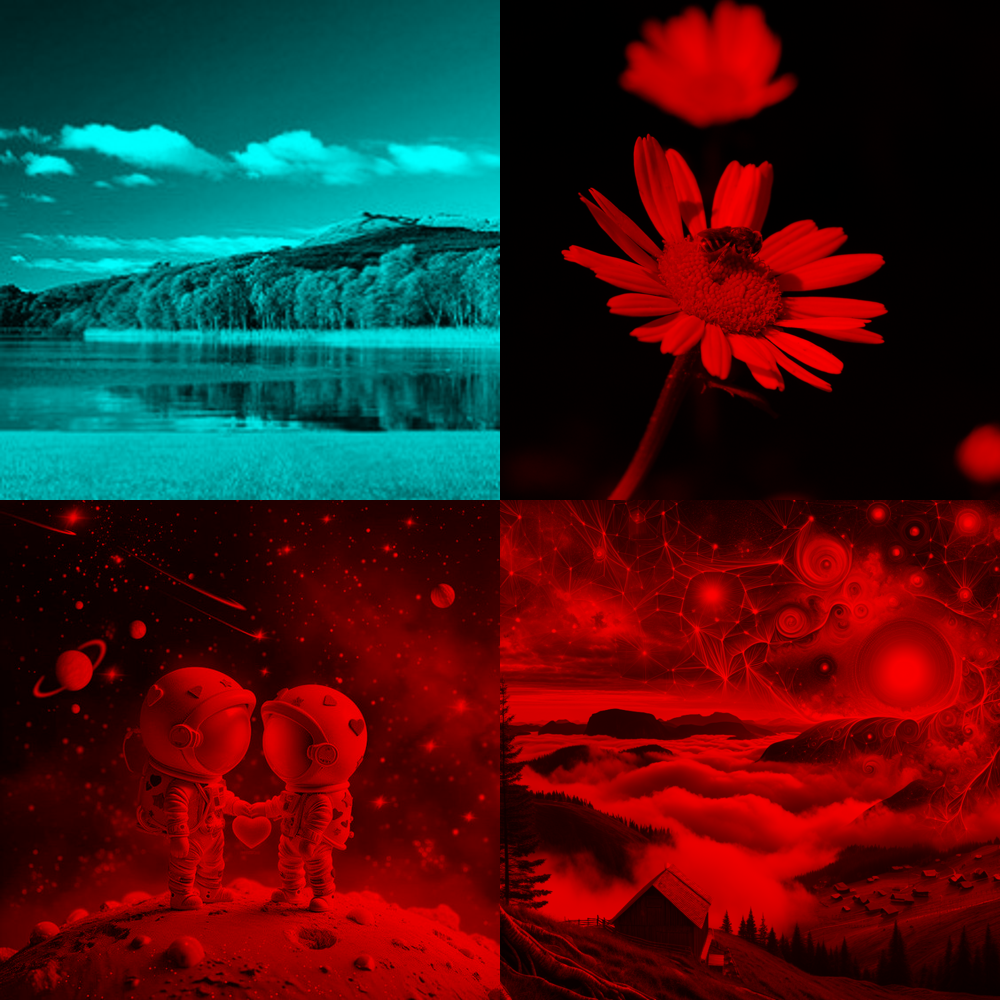

In [19]:
import random
from PIL import ImageEnhance, ImageOps
from IPython.display import display

def create_poster(folder_path, rows, cols):
    images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('png', 'jpg', 'jpeg'))]
    
    def process_image(image_path, size=500):
        with Image.open(image_path) as img:
            min_side = min(img.size)
            left = (img.width - min_side) // 2
            top = (img.height - min_side) // 2
            img = img.crop((left, top, left + min_side, top + min_side))
            img = img.resize((size, size))
            
            filter_color = random.choice(["red", "green", "blue", "yellow", "purple", "cyan"])
            enhancer = ImageEnhance.Color(img)
            img = enhancer.enhance(0.5)
            img = ImageOps.colorize(img.convert("L"), black="black", white=filter_color)
            return img

    poster_width = cols * 500
    poster_height = rows * 500
    poster = Image.new("RGB", (poster_width, poster_height))
    
    for i in range(rows):
        for j in range(cols):
            img_path = random.choice(images)
            processed_img = process_image(img_path)
            poster.paste(processed_img, (j * 500, i * 500))
    
    display(poster)
create_poster(image_folder, 2, 2)
